In [1]:
import numpy as np
import pandas as pd
import os
import missingno as msno
import seaborn as sns 


#from ydata_profiling import ProfileReport
from matplotlib import cbook
from scipy.stats import shapiro 
from scipy.stats import kstest, norm 
from scipy.stats import anderson
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('super_hero_info.csv', header=0, sep=',')

In [3]:
df

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
...,...,...,...,...,...,...,...,...,...,...,...
729,729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0
730,730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0
731,731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
732,732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0


In [4]:
#1.-Cual es el promedio de estatura para un super heroe malo hombre de Marvel Comics
df_man_bad = df[(df.Gender == 'Male') & (df.Alignment == 'bad') & (df.Publisher == 'Marvel Comics')]
df_man_bad

print('mean', df_man_bad.Height.mean())

mean 139.36526315789473


In [5]:
#2.-Cual es el minimo de estatura para un super heroe malo mujer de Marvel Comics
df_women_bad = df[(df.Gender == 'Female') & (df.Alignment == 'bad') & (df.Publisher == 'Marvel Comics')]
df_women_bad

print('min', df_women_bad.Height.min())

min -99.0


In [6]:
#3.-Cual es el mediana de estatura para un super heroe bueno hombre de Marvel Comics
df_man_good = df[(df.Gender == 'Male') & (df.Alignment == 'good') & (df.Publisher == 'Marvel Comics')]
df_man_good

print('median', df_man_good.Height.median())

median 183.0


In [7]:
#4.-Cual es el desviación estandar de estatura para un super heroe bueno mujer de Marvel Comics
df_women_good = df[(df.Gender == 'Female') & (df.Alignment == 'good') & (df.Publisher == 'Marvel Comics')]
df_women_good

print('std', df_women_good.Height.std())

std 94.42430655434082


In [8]:
#5.-Hacer la prueba de bondad y ajuste con shapiro-wilk para la estatura
sample = df['Height'].sample(n=50)

print('shapiro')
stat, p_value = shapiro(sample)

print('stat', stat)
print('p-value', p_value)

if p_value > 0.05:
    print('Acepta H0: tiene una distribucion normal')
else:
    print('Acepta H1: no tiene una distribución normal')
    
print()

shapiro
stat 0.6916131973266602
p-value 5.870333996682575e-09
Acepta H1: no tiene una distribución normal



In [9]:
#6.-Hacer la prueba de bondad y ajuste con kolmogorov-smirnov para la estatura
print('kstest')
stat, p_value = kstest(sample, norm.cdf)

print('stat', stat)
print('p-value', p_value)

if p_value > 0.05:
    print('Acepta H0: tienen una distribucion normal')
else:
    print('Acepta H1: no tiene una distribucion normal')
    
print()

kstest
stat 0.6599999999999999
p-value 6.580629903835467e-22
Acepta H1: no tiene una distribucion normal



In [10]:
#7.-Hacer la prueba de bondad y ajuste con anderson para la estatura

result = anderson(sample)

print('statistic', result.statistic)

print('valores criticos', result.critical_values)

print('')

statistic 7.662725061041698
valores criticos [0.538 0.613 0.736 0.858 1.021]



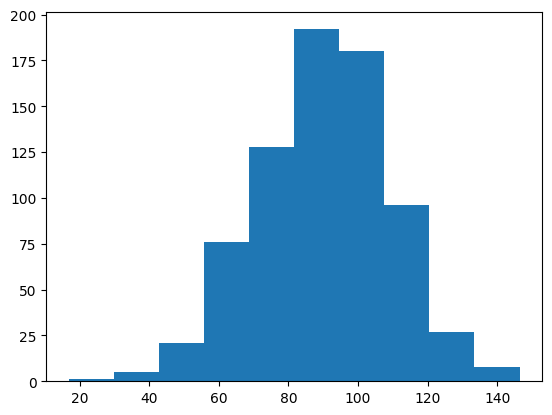

In [11]:
#8.-Comprobar el teroema del limite central de la estatura
estatura = []
for x in range(len(df)): 
    muestra = sample.sample(n=50, replace=True) 
    estatura.append(muestra.mean())

plt.hist(estatura) 
plt.show()